In [56]:
import nibabel as nib
import gzip
import os
import glob
import numpy as np

DATA_PATH = "./data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG"

dir_list = os.listdir(DATA_PATH)
seg_files = {}

In [59]:
for dir in dir_list:
    path = os.path.join(DATA_PATH, dir)
    file_list = glob.glob(path + "\\*.gz")
    seg = [file for file in file_list if file.endswith("seg.nii.gz")]
    if len(seg) != 0:
        seg_files[dir] = seg[0]

In [60]:
seg_files

{'Brats18_2013_10_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_10_1\\Brats18_2013_10_1_seg.nii.gz',
 'Brats18_2013_11_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_11_1\\Brats18_2013_11_1_seg.nii.gz',
 'Brats18_2013_12_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_12_1\\Brats18_2013_12_1_seg.nii.gz',
 'Brats18_2013_13_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_13_1\\Brats18_2013_13_1_seg.nii.gz',
 'Brats18_2013_14_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_14_1\\Brats18_2013_14_1_seg.nii.gz',
 'Brats18_2013_17_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_17_1\\Brats18_2013_17_1_seg.nii.gz',
 'Brats18_2013_18_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_18_1\\Brats18_2013_18_1_seg.nii.gz',
 'Brats18_2013_19_1': './data/BraTS2018/MICCAI_BraTS_2018_Data_Training/HGG\\Brats18_2013_19_1\\Brats18_2013_19

In [61]:
def regroup_mask_array(mask_array):
    regrouped = mask_array
    regrouped[regrouped == 3] = 0
    regrouped[regrouped != 0] = 100
    return regrouped

In [62]:
import PIL.Image
from io import BytesIO
import IPython.display

def showarray(a, fmt = 'png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

brain: Brats18_TCIA08_234_1, z: 90


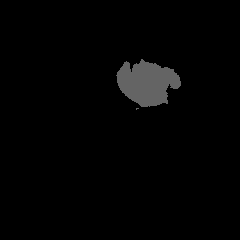

brain: Brats18_CBICA_ALU_1, z: 90


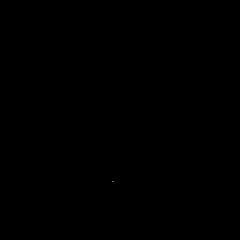

brain: Brats18_TCIA02_314_1, z: 90


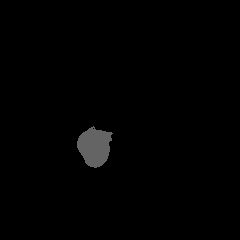

brain: Brats18_TCIA06_332_1, z: 90


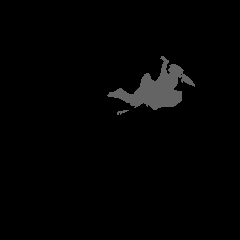

brain: Brats18_TCIA03_138_1, z: 90


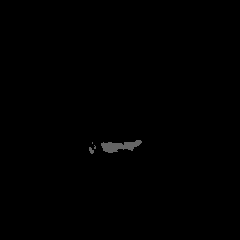

brain: Brats18_TCIA01_186_1, z: 90


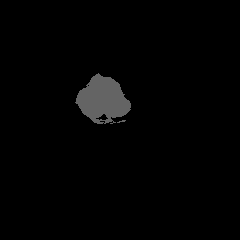

brain: Brats18_CBICA_ASH_1, z: 90


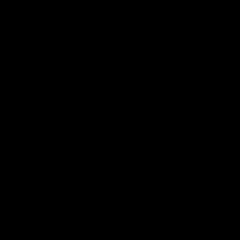

brain: Brats18_CBICA_AXJ_1, z: 90


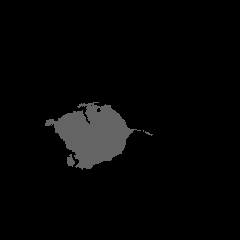

brain: Brats18_CBICA_AQR_1, z: 90


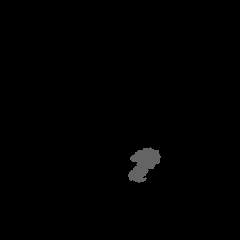

brain: Brats18_2013_25_1, z: 90


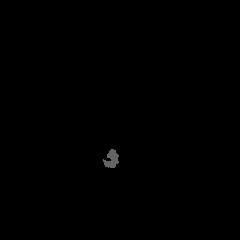

brain: Brats18_CBICA_AQD_1, z: 90


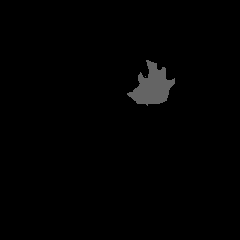

brain: Brats18_TCIA01_378_1, z: 90


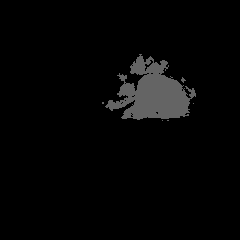

brain: Brats18_2013_20_1, z: 90


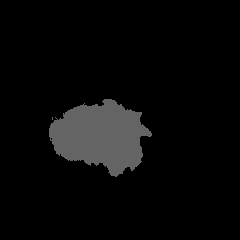

brain: Brats18_TCIA03_474_1, z: 90


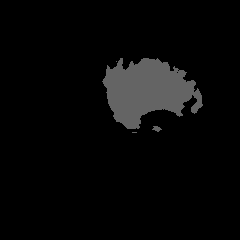

brain: Brats18_CBICA_ABY_1, z: 90


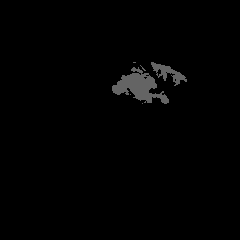

brain: Brats18_2013_4_1, z: 90


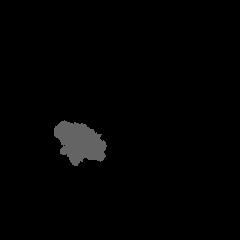

brain: Brats18_CBICA_APZ_1, z: 90


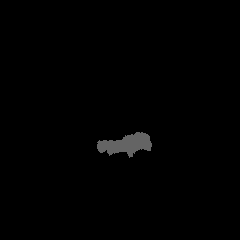

brain: Brats18_CBICA_ARZ_1, z: 90


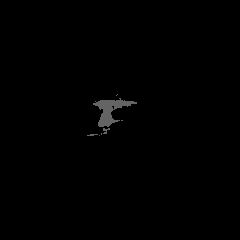

brain: Brats18_2013_5_1, z: 90


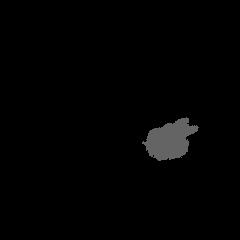

brain: Brats18_TCIA01_203_1, z: 90


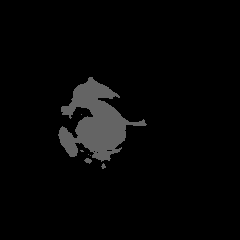

brain: Brats18_CBICA_AUR_1, z: 90


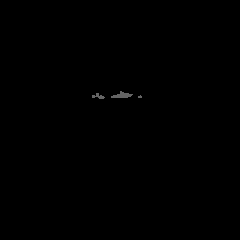

brain: Brats18_2013_22_1, z: 90


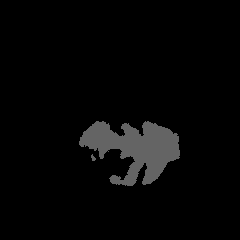

brain: Brats18_TCIA02_430_1, z: 90


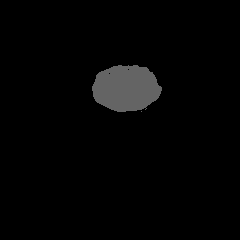

brain: Brats18_TCIA06_409_1, z: 90


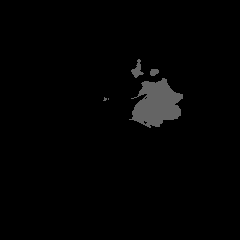

brain: Brats18_TCIA05_444_1, z: 90


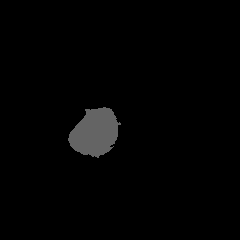

brain: Brats18_TCIA02_608_1, z: 90


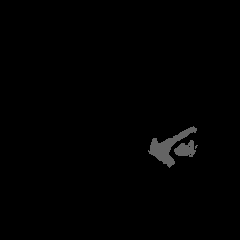

brain: Brats18_2013_17_1, z: 90


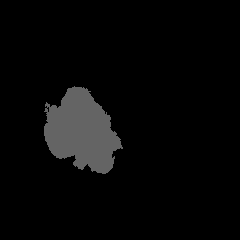

brain: Brats18_TCIA02_171_1, z: 90


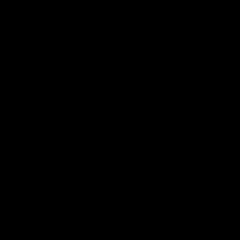

brain: Brats18_TCIA06_372_1, z: 90


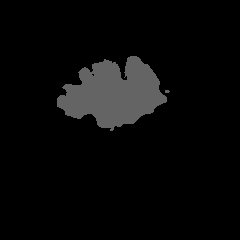

brain: Brats18_TCIA01_448_1, z: 90


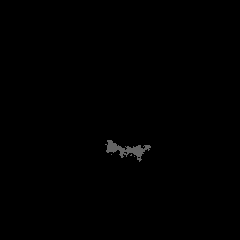

brain: Brats18_CBICA_APR_1, z: 90


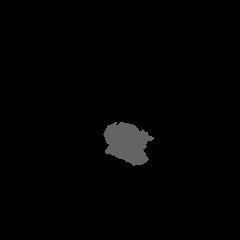

brain: Brats18_TCIA01_201_1, z: 90


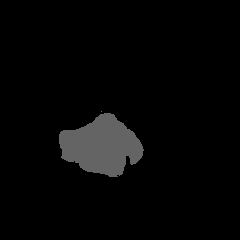

brain: Brats18_TCIA02_179_1, z: 90


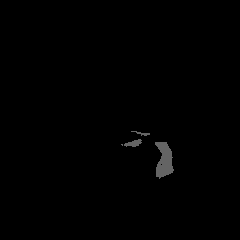

brain: Brats18_CBICA_AOP_1, z: 90


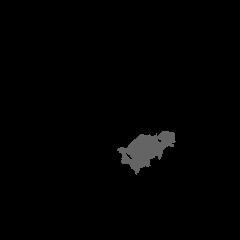

brain: Brats18_CBICA_AVJ_1, z: 90


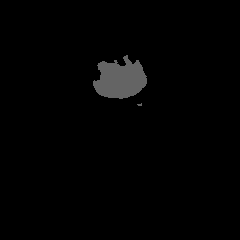

brain: Brats18_TCIA01_235_1, z: 90


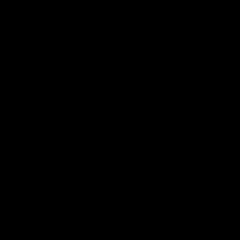

brain: Brats18_CBICA_AAP_1, z: 90


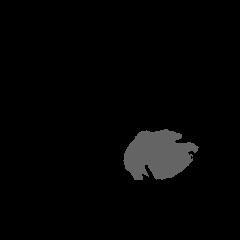

brain: Brats18_CBICA_AVV_1, z: 90


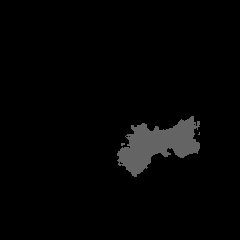

brain: Brats18_TCIA08_162_1, z: 90


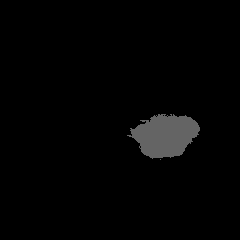

brain: Brats18_CBICA_AZH_1, z: 90


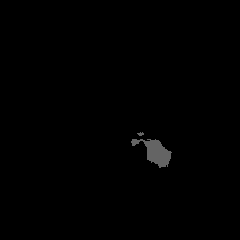

brain: Brats18_CBICA_AXW_1, z: 90


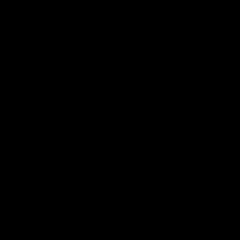

brain: Brats18_TCIA03_498_1, z: 90


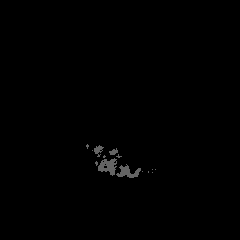

brain: Brats18_CBICA_AXM_1, z: 90


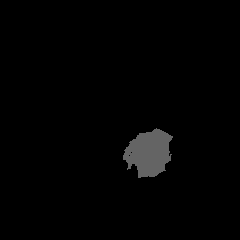

brain: Brats18_CBICA_AAB_1, z: 90


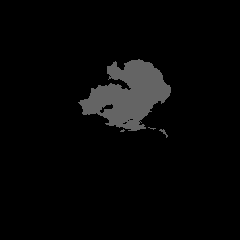

brain: Brats18_TCIA01_401_1, z: 90


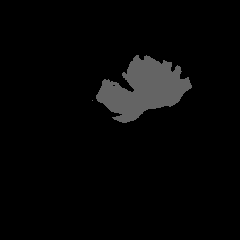

brain: Brats18_TCIA02_370_1, z: 90


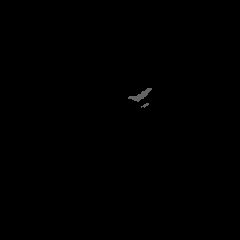

brain: Brats18_TCIA02_471_1, z: 90


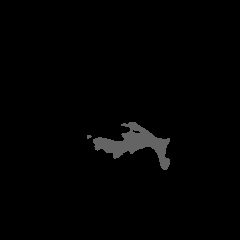

brain: Brats18_CBICA_ASY_1, z: 90


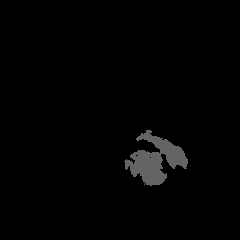

brain: Brats18_TCIA08_319_1, z: 90


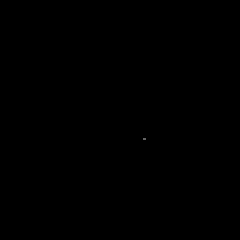

brain: Brats18_CBICA_BHM_1, z: 90


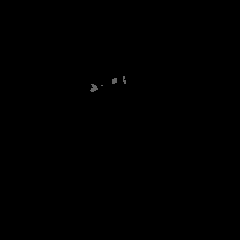

In [70]:
import json

with open('./visualize_set.json') as f:
    brain_to_visualize = json.load(f)

for brain in brain_to_visualize:
    mask = seg_files[brain]
    mask_array = nib.load(mask).get_fdata()
    mask_regrouped = regroup_mask_array(mask_array)
    z_idx = brain_to_visualize[brain]
    print(f"brain: {brain}, z: {z_idx}")
    showarray(mask_regrouped[..., z_idx])